In [ ]:
# packages
using Plots
using StatsBase
using Statistics
using LinearAlgebra
using LowRankApprox
using Formatting
using Colors 
using ImageFiltering
using Images
using ImageMagick
using TestImages
using ImageView
using ImageTransformations
using DataFrames
using CSV
using Dates
using FreqTables

# <font color="blue">1. What is data?</font>

## <font color="deepskyblue">One-dimensional data (numeric vectors)</font>

$$
\begin{bmatrix}
x_1 \\ \vdots \\ x_n
\end{bmatrix}, 
\quad
[y_1,\dotsc,y_n]
$$

In [2]:
# an example of one dimensional data
print("Daily maximum temperature (C) of July, August and September")
x=rand(20:35, 91)

Daily maximum temperature (C) of July, August and September

91-element Vector{Int64}:
 26
 29
 28
 29
 24
 27
 30
 22
 34
 33
 32
 25
 30
  ⋮
 33
 23
 24
 34
 32
 27
 35
 35
 27
 28
 21
 26

In [3]:
d0=Date(2022,7,1);
dates=string(d0);
for k=1:90
    dates=[dates;string(d0+Day(k))]
end
DataFrame(Date=dates, MaxTemp=x)

,Date,MaxTemp
,String,Int64
1,2022-07-01,26
2,2022-07-02,29
3,2022-07-03,28
4,2022-07-04,29
5,2022-07-05,24
6,2022-07-06,27
7,2022-07-07,30
8,2022-07-08,22
9,2022-07-09,34


## <font color=deepskyblue>Two-dimensional data (matirces)</font>

$$
A
=
[x_{ij}]_{m \times n}
=
\begin{bmatrix}
x_{11} & \dotsb & x_{1n}
\\
\vdots & & \vdots
\\
x_{m1} & \dotsb & x_{mn}
\end{bmatrix}
$$

In [6]:
# an example of two dimensional data 1
print("Grading of Calculus and Linear Algebra for 10 students")
A1=rand(50:100, 10,3)

Grading of Calculus and Linear Algebra for 10 students

10×3 Matrix{Int64}:
 50  78  76
 87  90  86
 99  58  60
 99  82  55
 72  80  93
 70  87  65
 69  78  99
 96  92  96
 54  74  63
 57  50  52

In [7]:
id=string.(101)
for k=2:10
    id=[id;string(100+k)];
end
DataFrame(ID=id, 
          Calculus=A1[:,1],
          LinearAlgebra=A1[:,2],
          Computer=A1[:,3])

,ID,Calculus,LinearAlgebra,Computer
,String,Int64,Int64,Int64
1,101,50,78,76
2,102,87,90,86
3,103,99,58,60
4,104,99,82,55
5,105,72,80,93
6,106,70,87,65
7,107,69,78,99
8,108,96,92,96
9,109,54,74,63


Grayscale Image

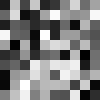

In [8]:
# an example of two dimensional data 2
print("Grayscale Image")
A2=rand(10,10)
Gray.(A2)

## <font color=deepskyblue>Three-dimensional data (more than two matrices)</font>

$$
A
=
[a_{ij}]_{m \times n}, 
\quad
B
=
[b_{ij}]_{m \times n}, 
\quad
C
=
[c_{ij}]_{m \times n}, 
\quad
\dotsc
$$

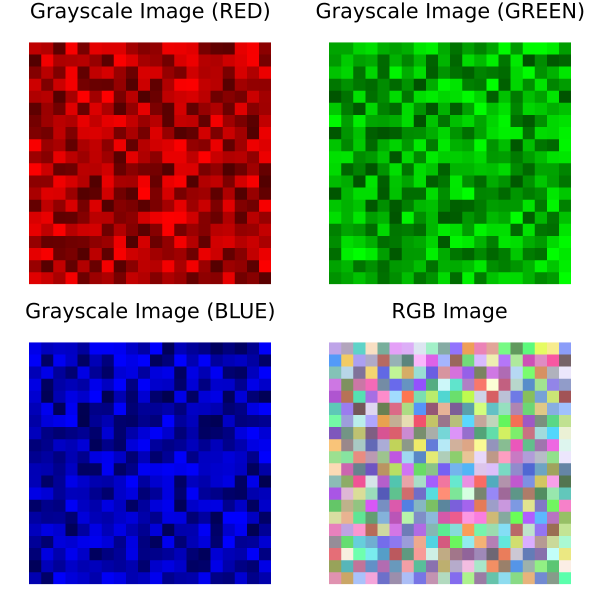

In [9]:
# an example of three-dimensional data
R=rand(80:255, 20, 20);
G=rand(80:255, 20, 20);
B=rand(80:255, 20, 20);
X=zeros(3,20,20);
X[1,:,:]=R/255;
X[2,:,:]=G/255;
X[3,:,:]=B/255;
P=colorview(RGB,X);

p1=plot(RGB.(R/255,0,0), 
    xaxis=false, 
    xticks=false, 
    yaxis=false, 
    yticks=false, 
    grid=false, 
    title="Grayscale Image (RED)")

p2=plot(RGB.(0,G/255,0), 
    xaxis=false, 
    xticks=false, 
    yaxis=false, 
    yticks=false, 
    grid=false, 
    title="Grayscale Image (GREEN)")

p3=plot(RGB.(0,0,B/255), 
    xaxis=false, 
    xticks=false, 
    yaxis=false, 
    yticks=false, 
    grid=false, 
    title="Grayscale Image (BLUE)")

p4=plot(P, 
    xaxis=false, 
    xticks=false, 
    yaxis=false, 
    yticks=false, 
    grid=false, 
    title="RGB Image")

p5=plot(p1, p2, p3, p4, 
     layout=(2,2), 
     size=(600,600), 
     margin=Plots.Measures.Length(:mm, 2.0))
savefig("rgb_matrix.png") 

p5

┌ Info: Saved animation to 
│   fn = /home/hc/Dropbox/Julia/jupyter/grayscale_animation.gif
└ @ Plots /home/hc/.julia/packages/Plots/1KWPG/src/animation.jl:114


Plots.AnimatedGif("/home/hc/Dropbox/Julia/jupyter/grayscale_animation.gif")
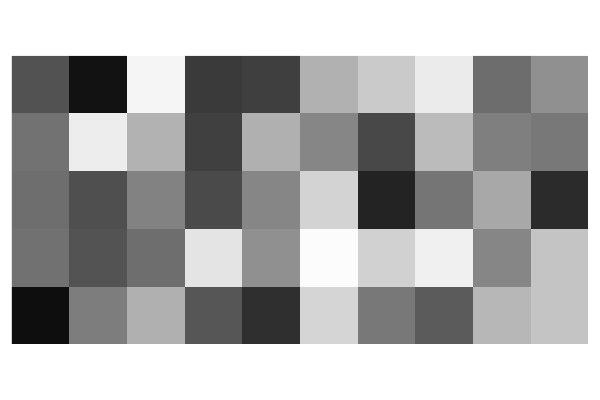

In [10]:
# an example of three-dimensional data
Z=rand(5,10,60);
anim1 = @animate for k=1:60
    plot(Gray.(Z[:,:,k]),
         xaxis=false, 
         xticks=false, 
         yaxis=false, 
         yticks=false, 
         grid=false)
end
gif(anim1, "grayscale_animation.gif", fps = 3)	

## <font color=deepskyblue>Four-dimensional data</font>

┌ Info: Saved animation to 
│   fn = /home/hc/Dropbox/Julia/jupyter/rgb_animation.gif
└ @ Plots /home/hc/.julia/packages/Plots/1KWPG/src/animation.jl:114


Plots.AnimatedGif("/home/hc/Dropbox/Julia/jupyter/rgb_animation.gif")
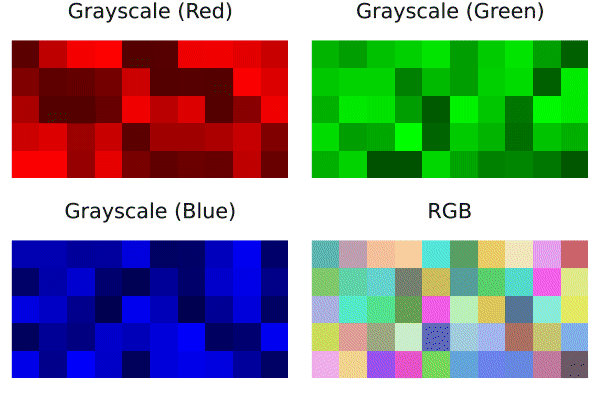

In [23]:
# an example of four-dimensional data
R=rand(80:255, 5, 10, 60);
G=rand(80:255, 5, 10, 60);
B=rand(80:255, 5, 10, 60);
V=zeros(3,5,10,60);
VR=zeros(3,5,10,60); 
VG=zeros(3,5,10,60);
VB=zeros(3,5,10,60);
Z=zeros(5,10,60);
V[1,:,:,:]=R/255;
V[2,:,:,:]=G/255;
V[3,:,:,:]=B/255;
VR[1,:,:,:]=R/255;
VR[2,:,:,:]=Z;
VR[3,:,:,:]=Z;
VG[1,:,:,:]=Z;
VG[2,:,:,:]=G/255;
VG[3,:,:,:]=Z;
VB[1,:,:,:]=Z;
VB[2,:,:,:]=Z;
VB[3,:,:,:]=B/255;
anim2 = @animate for k=1:60
    P1=plot(colorview(RGB,VR[:,:,:,k]),
         xaxis=false, 
         xticks=false, 
         yaxis=false, 
         yticks=false, 
         grid=false,
         title="Grayscale (Red)");
    P2=plot(colorview(RGB,VG[:,:,:,k]),
         xaxis=false, 
         xticks=false, 
         yaxis=false, 
         yticks=false, 
         grid=false,
         title="Grayscale (Green)");
    P3=plot(colorview(RGB,VB[:,:,:,k]),
         xaxis=false, 
         xticks=false, 
         yaxis=false, 
         yticks=false, 
         grid=false,
         title="Grayscale (Blue)");
    P4=plot(colorview(RGB,V[:,:,:,k]),
         xaxis=false, 
         xticks=false, 
         yaxis=false, 
         yticks=false, 
         grid=false,
         title="RGB");
   plot(P1,P2,P3,P4,
         layout=(2,2),
         xaxis=false, 
         xticks=false, 
         yaxis=false, 
         yticks=false, 
         grid=false)
end
gif(anim2, "rgb_animation.gif", fps = 3)	

# <font color="blue">2. One-dimensional data</font>

Using the data $x$, we study the information contained in $x$ and its visualization. 

## <font color="deepskyblue">Line graph</font>

$x^T=[x_1,\dotsc,x_n]$ is a discrete time series data and we can visualize it by a line graph. 

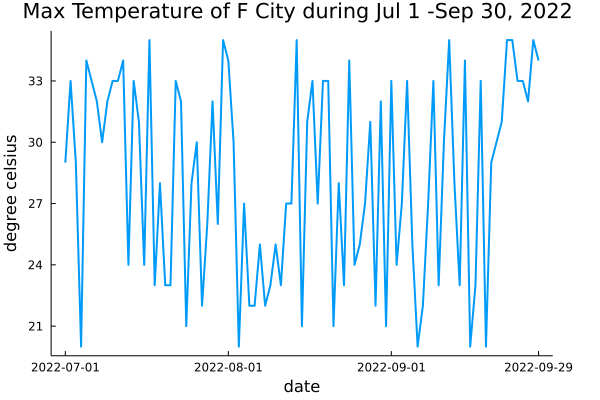

In [14]:
d1=d0+Day(31);
d2=d0+Day(62);
d3=d0+Day(90);
l0=string(d0);
l1=string(d1);
l2=string(d2);
l3=string(d3);    
plot(x,
    grid=false,
    linewidth=2, 
    title="Max Temperature of F City during Jul 1 -Sep 30, 2022 ", 
    right_margin=Plots.Measures.Length(:mm, 10.0),
    xticks = ([1 32 63 91;], [l0 l1 l2 l3]),
    xlabel="date",
    yaxis="degree celsius",
    legend=false)

## <font color="deepskyblue">Frequency table and histogram</font>

We see the frequency of data. Let $n=20,\dotsc,35$ be class values. Classify the data $x$ according to class intervals $[n-1/2,n+1/2)$.A histogram os a bar-graph of frequency of classes. 

In [56]:
# class values
class=20;
for k=21:35
    class=[class;k];
end

#frequencies
y=sort(countmap(x));
ry=100*y/91;
DataFrame(ClassValue=class,Freq=z)

LoadError: MethodError: no method matching *(::Int64, ::OrderedCollections.OrderedDict{Int64, Int64})
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at /usr/local/share/julia-1.7.3/share/julia/base/operators.jl:655
[0m  *(::T, [91m::T[39m) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at /usr/local/share/julia-1.7.3/share/julia/base/int.jl:88
[0m  *(::Union{Int16, Int32, Int64, Int8}, [91m::BigInt[39m) at /usr/local/share/julia-1.7.3/share/julia/base/gmp.jl:542
[0m  ...

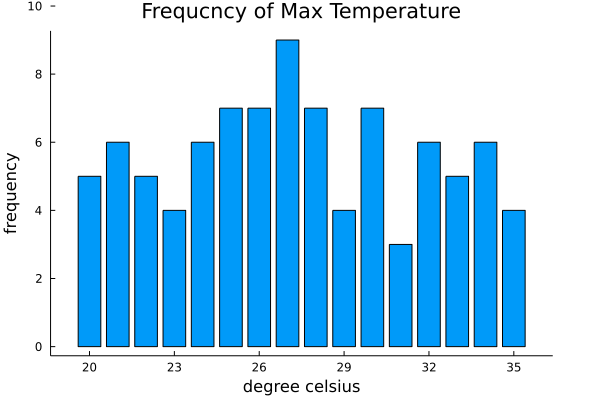

In [57]:
p6=bar(y,
    grid=false,
    title="Frequcncy of Max Temperature", 
    right_margin=Plots.Measures.Length(:mm, 10.0),
    xticks = ([20 23 26 29 32 35;], [20 23 26 29 32 35]),
    xlabel="degree celsius",
    yaxis="frequency",
    yticks = ([0 2 4 6 8 10;], [0 2 4 6 8 10]),
    legend=false)
savefig("histogram.png") 
p6

## <font color="deepskyblue">Mean, Median and Mode</font>

The mean of $x=[x_1,\dotsc,x_n]^T$ is defined by 

$$
\bar{x}
=
\frac{1}{n}
\sum_{k=1}^n
x_k.
$$

The median of $x=[x_1,\dotsc,x_n]^T$ is defined by 

\begin{align*}
  \operatorname{Me}(x)
& =
  X\left(\left[\frac{n}{2}\right]\right) 
  \quad
  (\text{even $n$}),
\\
  \operatorname{Me}(x)
& =
  \cfrac{X\left(\left[\cfrac{n-1}{2}\right]\right)+X\left(\left[\cfrac{n+1}{2}\right]\right)}{2}
  \quad
  (\text{odd $n$}),
\end{align*}

where $X$ is the rearrangement of $x$ in ascending or descending order. A data
The mode $\operatorname{Mo}(x)$ of 𝑥=[𝑥1,…,𝑥𝑛]𝑇 is the most frequent value of $x_1,\dotsc,x_n$, which is not necessarily one value.

In [48]:
print("Computation of the mean, meadian and mode")
# mean
m=sum(x)/length(x);
# median
me=median(x);
# mode
mo=mode(x);
DataFrame(Mean=m, 
          Median=me,
          Mode=mo)

Computation of the mean, meadian and mode

,Mean,Median,Mode
,Float64,Float64,Int64
1,27.3407,27.0,27


Consider an exapme of data 

$$
y=[1,2,3,4,5,6,7,8,1000]^T.
$$

Then 

$$
\bar{y}=115.11111111111111, 
\quad
\operatorname{Me}(y)=5. 
$$

The average $\bar{y}$ does not represent the properties of $y$ but 
the median $\operatorname{Me}(y)=5$ shows something about $y$. 

## <font color="deepskyblue">Variance and Standard Deviation</font>

Compare the following two data:

$$
u=[10,20,30,40,50,60,70,80,90],
\quad
v=[30,35,40,45,50,55,60,65,70].
$$

Then 

$$
\bar{u}=\bar{v}=\operatorname{Me}(u)=\operatorname{Me}(v)=50. 
$$

But their degrees of scatter are different. 
The variance of $x$

$$
\sigma_x^2
:=
\frac{1}{n-1}
\sum_{j=1}^n(x_j-\bar{x})^2
$$

or the standard deviation $\sigma_x$ describe the degree of scatter of $x$.

In [18]:
# variance
sigma2=sum((x.-m).^2)/(length(x)-1)

23.95726495726496

In [19]:
#standard deviation
std(x)

4.894615915193444

In [51]:
u=[10 20 30 40 50 60 70 80 90]';
v=[30 35 40 45 50 55 60 65 70]';
mu=sum(u)/length(u);
mv=sum(v)/length(v);
sigma_u2=sum((u.-mu).^2)/(length(u)-1);
sigma_v2=sum((v.-mu).^2)/(length(v)-1);
DataFrame(sigma_u2=sigma_u2, 
          sigma_v2=sigma_v2)

,sigma_u2,sigma_v2
,Float64,Float64
1,750.0,187.5
